In [1]:
import pandas as pd

## ExPLORE DATA

In [2]:
data = pd.read_csv('Email_spam.csv')

In [3]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
print(data['text'][1])

Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no  libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no  sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no 


In [6]:
df = data[data['spam']==0]

In [8]:
# example of non spam data
print(df['text'][1369])

Subject: sacramento weather station  fyi  - - - - - - - - - - - - - - - - - - - - - - forwarded by mike a roberts / hou / ect on 09 / 20 / 2000  09 : 06 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  scott tholan @ enron  09 / 19 / 2000 07 : 57 pm  to : mark tawney / hou / ect @ ect , gary taylor / hou / ect @ ect , mike a  roberts / hou / ect @ ect  cc : chris clark / na / enron @ enron  subject : sacramento weather station  hey guys ,  we ' re talking to a contractor ( s ) that can build us a weather station  ( hopefully very quickly ) for placement in sacramento , california . for a  variety of legal , contractor , and operational reasons , i need to confirm some  of the following requirements as soon as possible so we can proceed :  a ) you need rainfall , snowfall , and temperature measurement from one ,  high - accuracy commercially available weather station .  b ) you need a daily feed of this data to enron ' s weather desk : does this  mean one data dump at a set tim

In [9]:
print("This data has ", data.shape[0],"rows and ", data.shape[1],"columns")

This data has  5728 rows and  2 columns


In [10]:
data['spam'].unique()

array([1, 0], dtype=int64)

In [11]:
#provide the set of features we have
data.columns

Index(['text', 'spam'], dtype='object')

<AxesSubplot:>

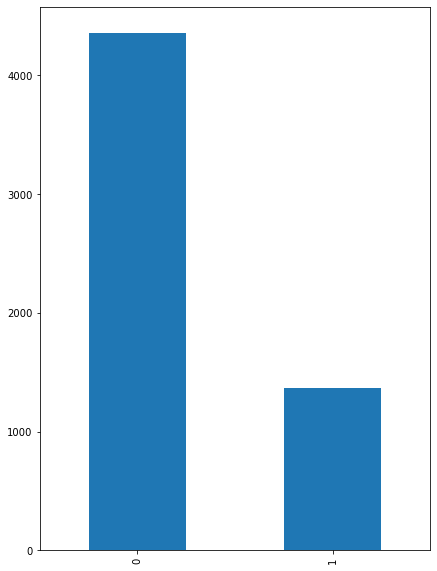

In [12]:
data['spam'].value_counts().head(32).plot(kind='bar', figsize = (7,10))

## Transform the Data

In [13]:
# check if we have missing values
data.isnull().sum()

text    0
spam    0
dtype: int64

In [14]:
# check if we have duplicate values
data.duplicated().sum()

33

In [15]:
# drop the duplicated values
data.drop_duplicates(inplace = True)

In [32]:
# Assuming 'data' is a DataFrame with a column named 'text'
# Assuming 'data' is a DataFrame
if 'text' in data.columns:
    for i in range(data.shape[0]):
        if isinstance(data.loc[i, 'text'], str):
            data.loc[i, 'text'] = data.loc[i, 'text'].split(' ', 1)[1]
        else:
            print(f"Warning: Skipping row {i} as 'text' column is not a string.")
else:
    print("Error: 'text' column not found in the DataFrame.")



Error: 'text' column not found in the DataFrame.


In [19]:
#check if only the word subject has removed from text
data.head()

,text,spam
0,irresistible your corporate identity lt is re...,1
1,stock trading gunslinger fanny is merrill but...,1
2,new homes made easy im wanting to show you th...,1
3,color printing special request additional inf...,1
4,"not have money , get software cds from here ! ...",1


In [20]:
# save to a csv file
data.to_csv('cleaned_data.csv', index = False)

## Creating Sklearn Pipeline

In [23]:
import nltk
nltk.download('stopwords')
nltk.download(['punkt','wordnet','averaged_perceptron_tagger'])
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

#Model libraries
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#Save the model
import joblib
from joblib import dump, load

#Evaluate the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Retrieve the data

In [24]:
data = pd.read_csv('Cleaned_data.csv')

In [25]:
# change the name of columns'
data.rename(columns = {'spam':'Label','text':'Email'},inplace = True)

### NLP Text Processing/Analysis


In [26]:
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

### Write a tokenization function to process/ clean text data (email)

In [33]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def tokenize(text):
    # Check if the value is not NaN
    if isinstance(text, str):
        # 1. Normalize: Convert to lower case and remove punctuation
        text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower().strip())
        
        # 2. Tokenizing: split text into words
        tokens = word_tokenize(text)
        
        # 3. Remove stop words: if a token is a stop word, then remove it
        words = [w for w in tokens if w not in stopwords.words("english")]
        
        # 4. Lemmatize and Stemming
        lemmed_words = [WordNetLemmatizer().lemmatize(w) for w in words]
        
        # Back to string from list
        text = " ".join(lemmed_words)
        return text
    else:
        return ""

# Apply the tokenize function to the 'Email' column and create a new column 'Pro_Text'
data['Pro_Text'] = data['Email'].apply(lambda x: tokenize(x))
data.head()


,Email,Label,Pro_Text
0,irresistible your corporate identity lt is re...,1,irresistible corporate identity lt really hard...
1,stock trading gunslinger fanny is merrill but...,1,stock trading gunslinger fanny merrill muzo co...
2,new homes made easy im wanting to show you th...,1,new home made easy im wanting show homeowner p...
3,color printing special request additional inf...,1,color printing special request additional info...
4,"not have money , get software cds from here ! ...",1,money get software cd software compatibility g...


In [34]:
# assign the independent features (text) to X variable and the target to y
X = data['Email']
y = data['Label']

### Split the dataset into Train and Test sets

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, train_size=0.67)

### Train the pipeline


In [43]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import pandas as pd

# Assuming you have a function 'tokenize' for tokenization

# Replace NaN values in 'X_train' with an empty string
X_train.fillna('', inplace=True)

# Create the pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

# Train the pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x00000292ABC9BA60>)),
                ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [44]:
# Predit using the trained model
predicted = pipeline.predict(X_test)

## Evaluate the model

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy = accuracy_score(y_test,predicted)

In [47]:
print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, predicted))

Accuracy: 0.77
Other Metrics:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1450
           1       0.00      0.00      0.00       430

    accuracy                           0.77      1880
   macro avg       0.39      0.50      0.44      1880
weighted avg       0.59      0.77      0.67      1880



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.metrics import confusion_matrix
## Plot confusion matrix
print(confusion_matrix(y_test, predicted))

[[1450    0]
 [ 430    0]]


In [49]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_curve


(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

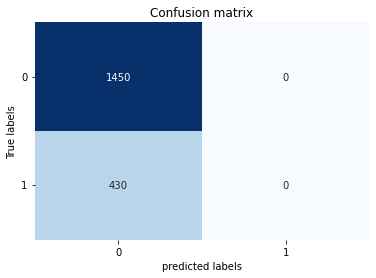

In [50]:
## Plot confusion matrix
classes = np.unique(y_test)

cm = confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()

sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="predicted labels", ylabel="True labels", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

In [51]:
import pickle

file_name = 'pipelinemodel'
pickle.dump(pipeline, open(file_name, 'wb'))
